<a href="https://colab.research.google.com/github/Ankit2759/ImageProcessing/blob/main/Segmentation_morphological.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

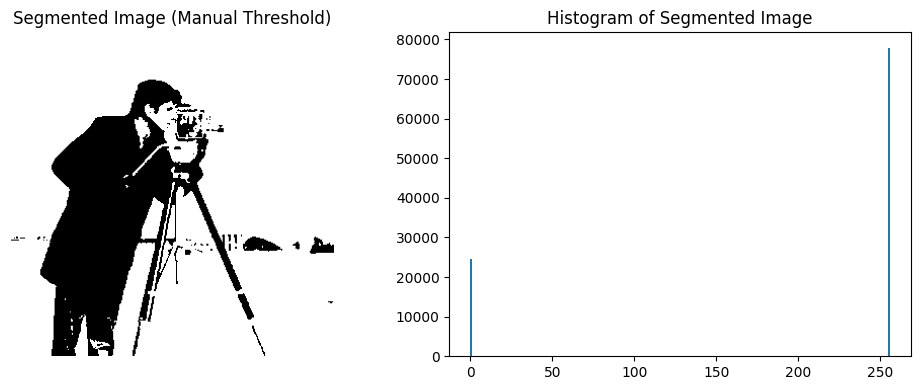

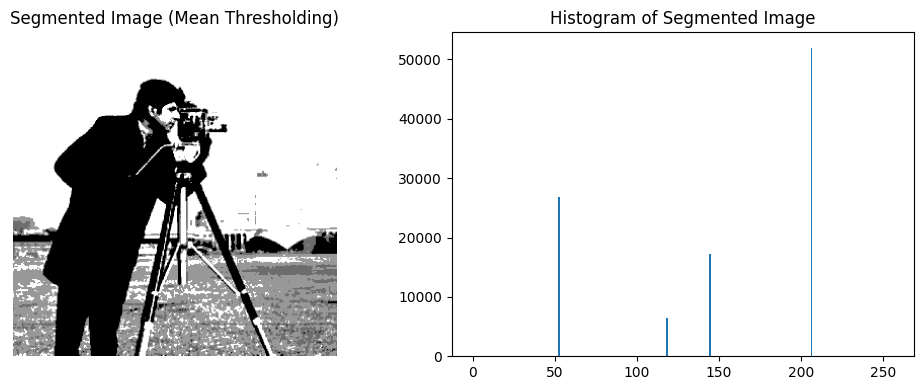

Otsu's Threshold = 96.00


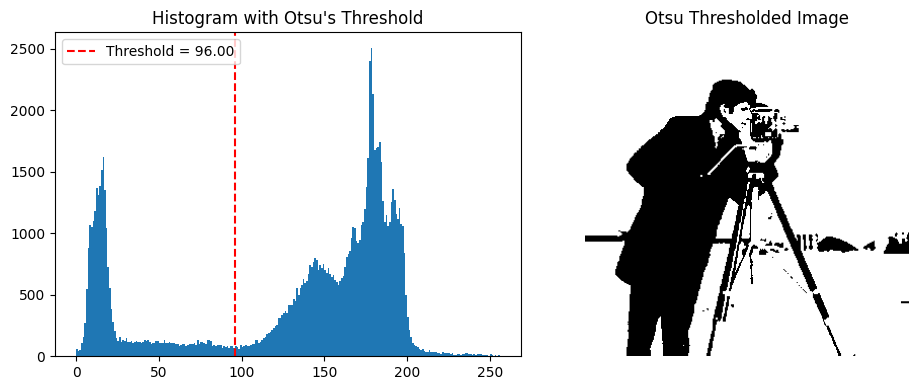

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu

# ===============================
# 1. SEGMENTATION USING HISTOGRAM
# ===============================

# Read the image
img = cv2.imread('/content/cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Compute histogram
counts, intensity = np.histogram(img.ravel(), bins=256, range=(0, 256))
prob = counts / counts.sum()

# Fixed threshold value
threshold = 78

# Apply manual thresholding
seg1 = np.where(img > threshold, 255, 0).astype(np.uint8)

# Display the segmented image and histogram
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(seg1, cmap='gray')
plt.title('Segmented Image (Manual Threshold)')
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(seg1.ravel(), bins=256, range=(0,256))
plt.title('Histogram of Segmented Image')
plt.tight_layout()
plt.show()


# ==================
# 2. MEAN THRESHOLDING
# ==================

I = cv2.imread('/content/cameraman.jpg', cv2.IMREAD_GRAYSCALE)
r, c = I.shape
th2 = np.mean(I)
th1 = 0.8 * th2
th3 = 1.2 * th2

p1 = (0 + th1) / 2
p2 = (th1 + th2) / 2
p3 = (th2 + th3) / 2
p4 = (th3 + 255) / 2

# Apply mean-based multi-level thresholding
I2 = np.zeros_like(I, dtype=np.uint8)

for i in range(r):
    for j in range(c):
        if I[i, j] < th1:
            I2[i, j] = p1
        elif th1 <= I[i, j] < th2:
            I2[i, j] = p2
        elif th2 <= I[i, j] < th3:
            I2[i, j] = p3
        else:
            I2[i, j] = p4

# Display mean-thresholded image and histogram
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(I2, cmap='gray')
plt.title('Segmented Image (Mean Thresholding)')
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(I2.ravel(), bins=256, range=(0,256))
plt.title('Histogram of Segmented Image')
plt.tight_layout()
plt.show()


# =====================
# 3. OTSU THRESHOLDING
# =====================

I3 = cv2.imread('/content/cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Compute Otsu’s threshold using skimage
T = threshold_otsu(I3)
print(f"Otsu's Threshold = {T:.2f}")

# Apply Otsu threshold
otsu_img = (I3 > T).astype(np.uint8) * 255

# Display histogram and thresholded image
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(I3.ravel(), bins=256, range=(0,256))
plt.axvline(x=T, color='r', linestyle='--', label=f'Threshold = {T:.2f}')
plt.legend()
plt.title("Histogram with Otsu's Threshold")

plt.subplot(1,2,2)
plt.imshow(otsu_img, cmap='gray')
plt.title("Otsu Thresholded Image")
plt.axis('off')
plt.tight_layout()
plt.show()


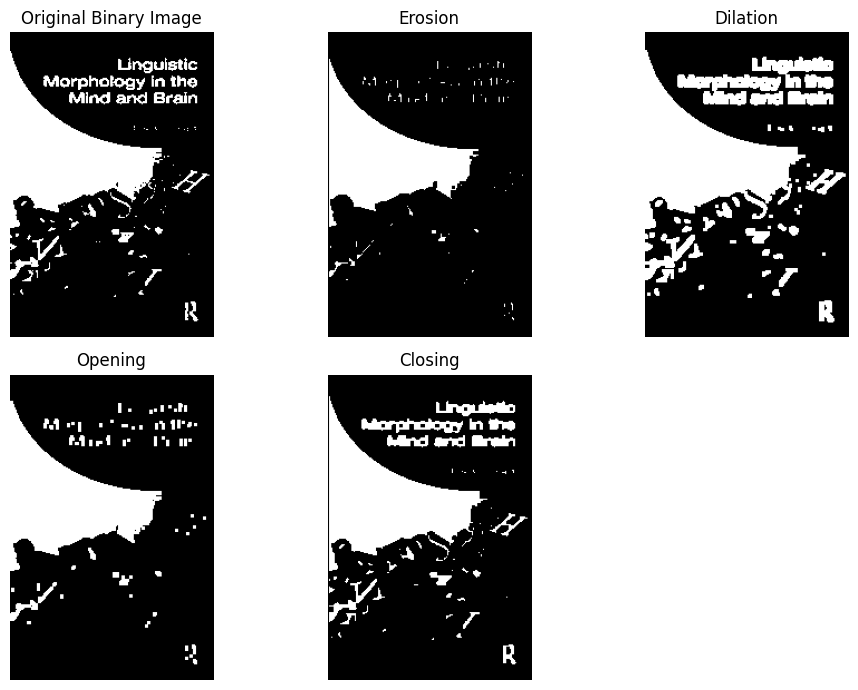

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Read and threshold the image
# ==========================
img = cv2.imread('/content/images.jpeg', cv2.IMREAD_GRAYSCALE)
img = img.astype(float) / 255.0    # Normalize to 0–1

# Threshold
T = 0.35
bw = (img > T).astype(np.uint8)    # Binary image (0 or 1)

# Structuring element (3x3 ones)
SE = np.ones((3, 3), dtype=np.uint8)

m, n = bw.shape

# ==========================
# Erosion
# ==========================
bw_pad = np.pad(bw, pad_width=1, mode='constant', constant_values=0)
eroded = np.zeros_like(bw, dtype=np.uint8)

for i in range(1, m+1):
    for j in range(1, n+1):
        window = bw_pad[i-1:i+2, j-1:j+2]
        if np.all(window[SE == 1] == 1):
            eroded[i-1, j-1] = 1

# ==========================
# Dilation
# ==========================
bw_pad = np.pad(bw, pad_width=1, mode='constant', constant_values=0)
dilated = np.zeros_like(bw, dtype=np.uint8)

for i in range(1, m+1):
    for j in range(1, n+1):
        window = bw_pad[i-1:i+2, j-1:j+2]
        if np.any(window[SE == 1] == 1):
            dilated[i-1, j-1] = 1

# ==========================
# Opening = Erosion → Dilation
# ==========================
bw_pad = np.pad(bw, pad_width=1, mode='constant', constant_values=0)
temp = np.zeros_like(bw, dtype=np.uint8)
for i in range(1, m+1):
    for j in range(1, n+1):
        window = bw_pad[i-1:i+2, j-1:j+2]
        if np.all(window[SE == 1] == 1):
            temp[i-1, j-1] = 1

bw_pad = np.pad(temp, pad_width=1, mode='constant', constant_values=0)
opened = np.zeros_like(bw, dtype=np.uint8)
for i in range(1, m+1):
    for j in range(1, n+1):
        window = bw_pad[i-1:i+2, j-1:j+2]
        if np.any(window[SE == 1] == 1):
            opened[i-1, j-1] = 1

# ==========================
# Closing = Dilation → Erosion
# ==========================
bw_pad = np.pad(bw, pad_width=1, mode='constant', constant_values=0)
temp = np.zeros_like(bw, dtype=np.uint8)
for i in range(1, m+1):
    for j in range(1, n+1):
        window = bw_pad[i-1:i+2, j-1:j+2]
        if np.any(window[SE == 1] == 1):
            temp[i-1, j-1] = 1

bw_pad = np.pad(temp, pad_width=1, mode='constant', constant_values=0)
closed = np.zeros_like(bw, dtype=np.uint8)
for i in range(1, m+1):
    for j in range(1, n+1):
        window = bw_pad[i-1:i+2, j-1:j+2]
        if np.all(window[SE == 1] == 1):
            closed[i-1, j-1] = 1

# ==========================
# Display results
# ==========================
plt.figure(figsize=(10,7))
plt.subplot(2,3,1), plt.imshow(bw, cmap='gray'), plt.title('Original Binary Image'), plt.axis('off')
plt.subplot(2,3,2), plt.imshow(eroded, cmap='gray'), plt.title('Erosion'), plt.axis('off')
plt.subplot(2,3,3), plt.imshow(dilated, cmap='gray'), plt.title('Dilation'), plt.axis('off')
plt.subplot(2,3,4), plt.imshow(opened, cmap='gray'), plt.title('Opening'), plt.axis('off')
plt.subplot(2,3,5), plt.imshow(closed, cmap='gray'), plt.title('Closing'), plt.axis('off')
plt.tight_layout()
plt.show()
